In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
df.drop(columns=['Gender'],inplace=True)

In [18]:
#plt.figure(figsize=(10,6))
#sns.boxplot(df['Age'])
#plt.show()

In [19]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [30]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [45]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [46]:
X_test_scaled

,Age,EstimatedSalary
0,-0.798951,0.494608
1,-0.021265,-0.577359
2,-0.312897,0.146943
3,-0.798951,0.262831
4,-0.312897,-0.577359
...,...,...
75,-1.965480,0.349747
76,0.367578,0.262831
77,0.173157,-0.287638
78,1.436896,-1.040912


In [48]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


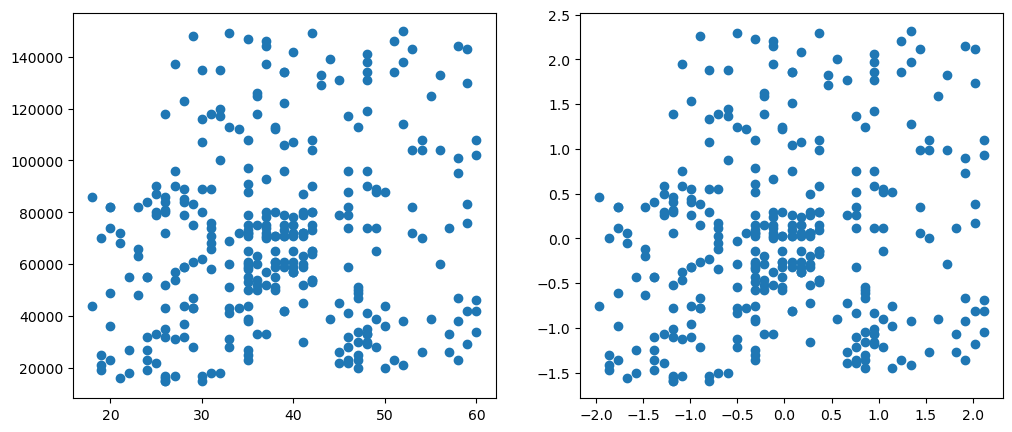

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Age"],X_train['EstimatedSalary'])
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [54]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [56]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score
print('actual accuracy score',accuracy_score(y_pred,y_test))
print('After scaled accuracy score',accuracy_score(y_pred_scaled,y_test))

actual accuracy score 0.725
After scaled accuracy score 0.925
